In [1]:
import matplotlib.pyplot as plt
import cv2
from keras import models
import numpy as np
import pdb

2022-12-11 22:43:42.942197: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
#img = cv2.imread('./PKLot/PKLot/PUCPR/Cloudy/2012-09-12/2012-09-12_06_05_16.jpg')
img = cv2.imread('./PKLot/PKLot/PUCPR/Cloudy/2012-09-28/2012-09-28_07_26_01.jpg')
img = cv2.resize(img, (1350, 720), interpolation = cv2.INTER_AREA)
#img = mpimg.imread('./PKLot/PKLotSegmented_resized/PUC/Rainy/2012-10-23/Occupied/2012-10-23_08_15_50#006.jpg')

# model = models.load_model('./simple_nn/simple_nn_linear')
model = models.load_model('./simple_conv/simple_conv_weights_dense_leaky_relu')

In [32]:
step = 30
w_size = 45
heatmap_empty = np.zeros((img.shape[0] // step, img.shape[1] // step))
heatmap_occupied = np.zeros(heatmap_empty.shape)

print(img.shape)
print(heatmap_empty.shape)
for column in range(heatmap_empty.shape[1]):
    for row in range(heatmap_empty.shape[0]):
        segment = img[row*step:row*step+w_size, column*step:column*step+w_size, :]
        print(row*step+step, column*step+step)
        # if column*step+90 == 810:
        #     pdb.set_trace()
        prediction = model.predict(cv2.resize(segment, (90, 90)).reshape((1, 90, 90, 3)))
        heatmap_empty[row, column] = prediction[0][0]
        heatmap_occupied[row, column] = prediction[0][1]

(720, 1350, 3)
(16, 30)
45 45
1/1 [==============================] - 0s 54ms/step
90 45
1/1 [==============================] - 0s 70ms/step
135 45
1/1 [==============================] - 0s 29ms/step
180 45
1/1 [==============================] - 0s 37ms/step
225 45
1/1 [==============================] - 0s 51ms/step
270 45
1/1 [==============================] - 0s 33ms/step
315 45
1/1 [==============================] - 0s 57ms/step
360 45
1/1 [==============================] - 0s 83ms/step
405 45
1/1 [==============================] - 0s 102ms/step
450 45
1/1 [==============================] - 0s 51ms/step
495 45
1/1 [==============================] - 0s 48ms/step
540 45
1/1 [==============================] - 0s 29ms/step
585 45
1/1 [==============================] - 0s 36ms/step
630 45
1/1 [==============================] - 0s 57ms/step
675 45
1/1 [==============================] - 0s 75ms/step
720 45
1/1 [==============================] - 0s 41ms/step
45 90
1/1 [======================

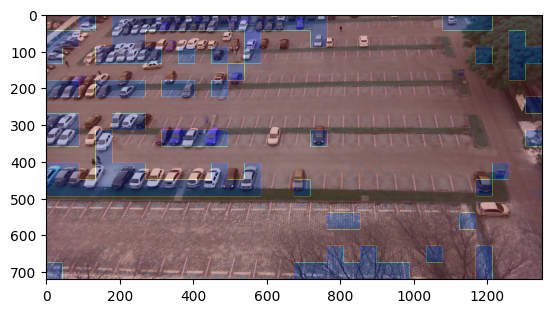

In [33]:
plt.imshow(img)
plt.imshow(cv2.resize(heatmap_empty, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST), cmap='jet', alpha=0.3)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


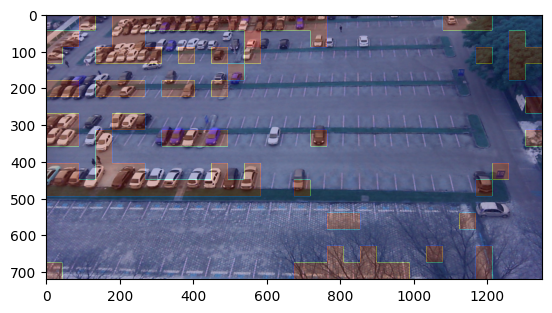

In [34]:
plt.imshow(img)
plt.imshow(cv2.resize(heatmap_occupied, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST), cmap='jet', alpha=0.3)
print(cv2.resize(heatmap_occupied, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST))

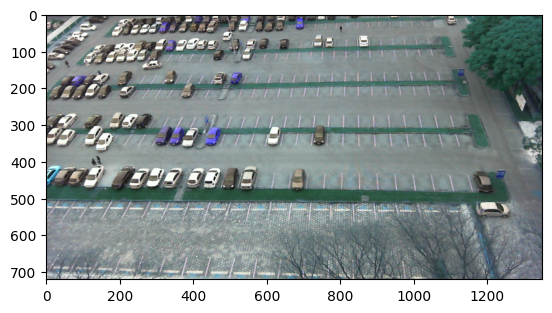

In [35]:
plt.imshow(img)